In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Чтение данных

In [2]:
df = pd.read_csv('2018.csv')

### Описательная статистика и визуализация

In [3]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       155 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.fillna((df['Perceptions of corruption'].mean()), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


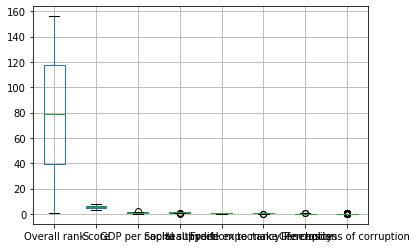

In [8]:
df.boxplot()

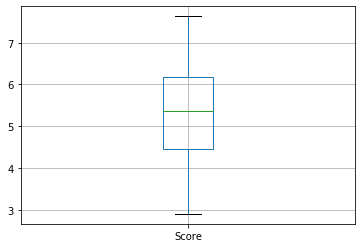

In [9]:
df.boxplot('Score')

In [10]:
#iqr = df['Perceptions of corruption'].quantile(0.75) - df['Perceptions of corruption'].quantile(0.25)
#df = df[(df['Perceptions of corruption'] < (df['Perceptions of corruption'].quantile(0.75) + 1.5*iqr)) & (df['Perceptions of corruption'] > (df['Perceptions of corruption'].quantile(0.25)-1.5*iqr))]
#0.75quant + 1.5 iqr, iqr = q75-q25
#0.25 - 1,5 iqr

### Матрица корреляции

In [11]:
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.369107
Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.403234
GDP per capita,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.309626
Social support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.216877
Healthy life expectancy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.315481
Freedom to make life choices,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.460788
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.362246
Perceptions of corruption,-0.369107,0.403234,0.309626,0.216877,0.315481,0.460788,0.362246,1.000000


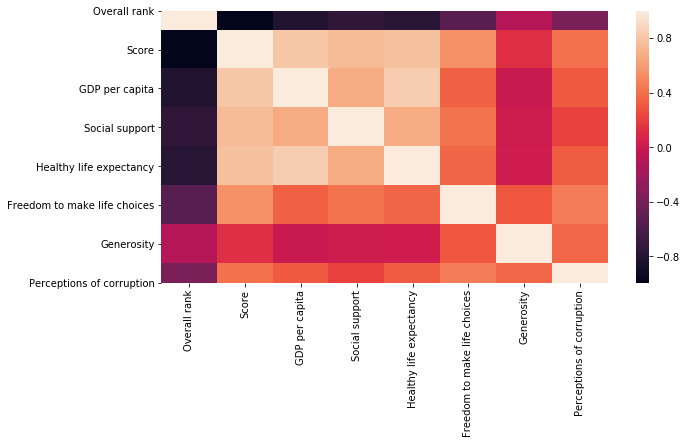

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df.corr(), ax=ax)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

### Регрессия

In [14]:
model = LinearRegression()
#RMSE, R^2
df.drop(inplace = True, columns = ['Country or region', 'Overall rank'])

In [15]:
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [16]:
y = df['Score']
X = df.drop(columns = 'Score')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [18]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('R^2 =', model.score(X_train, y_train))

R^2 = 0.7939793252584194


In [25]:
print('RMSE =', mean_squared_error(y_test, model.predict(X_test), squared = False))

RMSE = 0.5397578349412349


In [20]:
coefs = pd.DataFrame(model.coef_)
coefs

,0
0,0.954456
1,1.119927
2,1.026770
3,0.951679
4,0.575587
5,0.609558


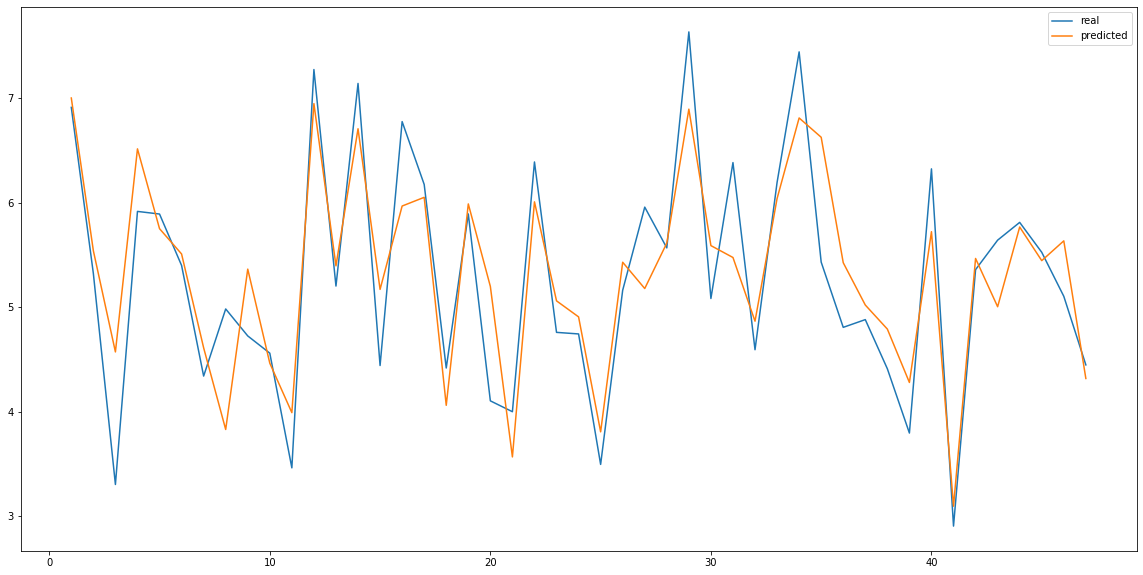

In [21]:
plt.figure(figsize=(20,10))
plt.plot([i+1 for i in range(len(y_test))], y_test, label = 'real')
plt.plot([i+1 for i in range(len(y_test))], pred, label = 'predicted')
plt.legend()
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor
     
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

In [23]:
#plt.figure(figsize=(10, 6))
#plt.plot(X_test, y_test, "b")
#plt.scatter(X_train, y_train, c="b", s=20)
#plt.plot(X_test, reg_tree_pred, "g", lw=2)
#plt.xlim([-5, 5])
#plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
#plt.show()

In [24]:
reg_tree.score(X_test, y_test)

0.46357982168698275